# Objectif :comparaison entre les 4 modèles de Régression logistique, SVM, Decision Tree et Random Forest pour la base bank ( équilibré et non équilibré)

In [1]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from collections import Counter
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import tensorflow

In [2]:
!pip install imblearn


You should consider upgrading via the 'c:\users\wassim ben daly\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
df= pd.read_csv(r"C:\Users\Wassim Ben Daly\Downloads\bank.csv", delimiter = ";")


In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
x=df.iloc[:,:16]

In [6]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other


In [7]:
y=df['y']

In [8]:
y

0       no
1       no
2       no
3       no
4       no
        ..
4516    no
4517    no
4518    no
4519    no
4520    no
Name: y, Length: 4521, dtype: object

In [9]:
Counter(y)

Counter({'no': 4000, 'yes': 521})

In [10]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [11]:
from sklearn.preprocessing import LabelEncoder


In [12]:
f = MultiColumnLabelEncoder(df).fit_transform(df)

In [13]:
f


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,11,10,1,0,0,1475,0,0,0,18,10,75,0,0,0,3,0
1,14,7,1,1,0,2030,1,1,0,10,8,216,0,228,4,0,0
2,16,4,2,2,0,1303,1,0,0,15,0,181,0,219,1,0,0
3,11,4,1,2,0,1352,1,1,2,2,6,195,3,0,0,3,0
4,40,1,1,1,0,274,1,0,2,4,8,222,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,14,7,1,1,0,119,1,0,0,29,5,325,4,0,0,3,0
4517,38,6,1,2,1,0,1,1,2,8,8,149,0,0,0,3,0
4518,38,9,1,1,0,558,0,0,0,18,1,147,10,0,0,3,0
4519,9,1,1,1,0,1187,0,0,0,5,3,125,3,140,3,1,0


In [14]:
x=f.iloc[:,:16]

In [15]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,11,10,1,0,0,1475,0,0,0,18,10,75,0,0,0,3
1,14,7,1,1,0,2030,1,1,0,10,8,216,0,228,4,0
2,16,4,2,2,0,1303,1,0,0,15,0,181,0,219,1,0
3,11,4,1,2,0,1352,1,1,2,2,6,195,3,0,0,3
4,40,1,1,1,0,274,1,0,2,4,8,222,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,14,7,1,1,0,119,1,0,0,29,5,325,4,0,0,3
4517,38,6,1,2,1,0,1,1,2,8,8,149,0,0,0,3
4518,38,9,1,1,0,558,0,0,0,18,1,147,10,0,0,3
4519,9,1,1,1,0,1187,0,0,0,5,3,125,3,140,3,1


In [16]:
y=f['y']

In [17]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int32

In [18]:
Counter(y)

Counter({0: 4000, 1: 521})

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
sm = SMOTE()
x_sm, y_sm = sm.fit_resample(x, y)

In [21]:
counter = Counter(y_sm)
print(counter)

Counter({0: 4000, 1: 4000})


# Régression logistique NE (base non équilibré)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)


In [23]:
modele_regLog = linear_model.LogisticRegression(random_state = 0,
solver = 'liblinear', multi_class = 'auto')

In [25]:
modele_regLog.fit(X_train,y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [26]:
y_pred=modele_regLog.predict(X_test)

In [28]:
precision = modele_regLog.score(X_test,y_test)


In [29]:
print(precision*100)



87.79840848806366


In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8779840848806366


In [31]:
print(metrics.classification_report( y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       993
           1       0.50      0.26      0.34       138

    accuracy                           0.88      1131
   macro avg       0.70      0.61      0.64      1131
weighted avg       0.85      0.88      0.86      1131



In [32]:
from sklearn import metrics
mat_conf=metrics.confusion_matrix( y_test,y_pred)
print(metrics.confusion_matrix( y_test,y_pred))

[[957  36]
 [102  36]]


<AxesSubplot:>

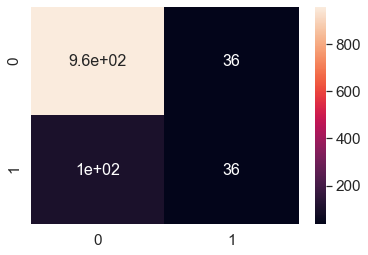

In [34]:
import seaborn as sn

sn.set(font_scale=1.4)#for label size
sn.heatmap(mat_conf, annot=True,annot_kws={"size": 16})

In [35]:
roc_auc_score(y_test, y_pred, multi_class='ovo', average='weighted')


0.612307894391173

In [37]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

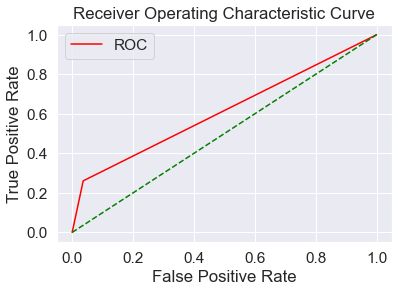

In [39]:
import matplotlib.pyplot as plt
fper, tper, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fper, tper)

# Régression logistique E (base équilibré)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x_sm, y_sm, random_state = 0)


In [41]:
modele_regLog = linear_model.LogisticRegression(random_state = 0,
solver = 'liblinear' ,multi_class = 'auto')

In [42]:
modele_regLog.fit(X_train,y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [43]:
y_pred=modele_regLog.predict(X_test)

In [44]:
precision = modele_regLog.score(X_test,y_test)


In [45]:
print(precision*100)


84.85000000000001


In [46]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8485


In [47]:
print(metrics.classification_report( y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       988
           1       0.85      0.86      0.85      1012

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



In [48]:
mat_conf=metrics.confusion_matrix( y_test,y_pred)
print(metrics.confusion_matrix( y_test,y_pred))

[[831 157]
 [146 866]]


<AxesSubplot:>

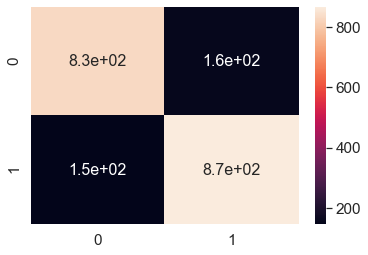

In [49]:
sn.set(font_scale=1.4)#for label size
sn.heatmap(mat_conf, annot=True,annot_kws={"size": 16})

In [50]:
roc_auc_score(y_test, y_pred, multi_class='ovo', average='weighted')


0.8484121713526748

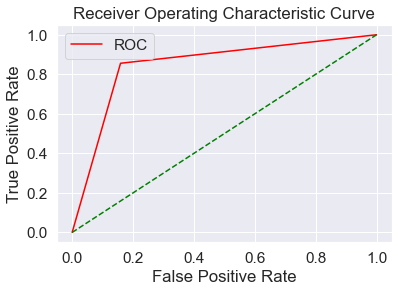

In [51]:
fper, tper, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fper, tper)

# SVM NE

In [52]:
 X_train, X_test, y_train, y_test = \
    train_test_split(x,y,
                     test_size=0.3)

In [53]:
from sklearn.svm import SVC

In [54]:
classifier = SVC(kernel = 'linear', random_state = 0)


In [55]:
classifier.fit(X_train, y_train)
#Prediction sur le Test set

SVC(kernel='linear', random_state=0)

In [56]:
y_pred = classifier.predict(X_test)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1219
           1       0.00      0.00      0.00       138

    accuracy                           0.90      1357
   macro avg       0.45      0.50      0.47      1357
weighted avg       0.81      0.90      0.85      1357



C:\Users\Wassim Ben Daly\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wassim Ben Daly\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wassim Ben Daly\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
roc_auc_score(y_test, y_pred, multi_class='ovo', average='weighted')


0.5

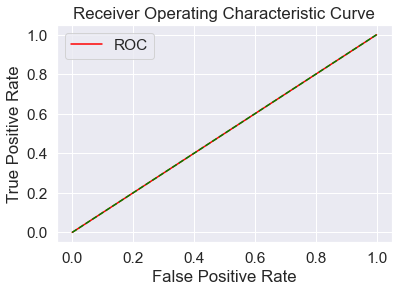

In [59]:
fper, tper, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fper, tper)

# SVM E

In [121]:
 X_train, X_test, y_train, y_test = \
    train_test_split(x, y,
                     test_size=0.3)

In [122]:
classifier = SVC(kernel = 'linear', random_state = 0)

In [115]:
classifier.fit(X_train, y_train)
#Prediction sur le Test set

SVC(kernel='linear', random_state=0)

In [116]:
y_pred = classifier.predict(X_test)

In [117]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8828297715549005


In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1198
           1       0.00      0.00      0.00       159

    accuracy                           0.88      1357
   macro avg       0.44      0.50      0.47      1357
weighted avg       0.78      0.88      0.83      1357



C:\Users\Wassim Ben Daly\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wassim Ben Daly\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wassim Ben Daly\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [127]:
roc_auc_score(y_test, y_pred, multi_class='ovo', average='weighted')


0.5

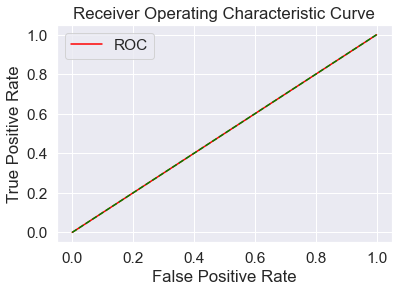

In [128]:
fper, tper, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fper, tper)

# Decision Tree NE

In [70]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1) # 70% training and 30% test

In [71]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [72]:
# Model Accuracy, how often is the classifier correct?
#Indicateurs de performances

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8577745025792188


In [73]:
#rapport de prédiction
print(metrics.classification_report( y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1182
           1       0.45      0.42      0.43       175

    accuracy                           0.86      1357
   macro avg       0.68      0.67      0.68      1357
weighted avg       0.85      0.86      0.86      1357



In [74]:
import numpy
print(numpy.unique(y_pred,return_counts=True))


(array([0, 1]), array([1191,  166], dtype=int64))


In [75]:
mat_conf=metrics.confusion_matrix( y_test,y_pred)
print(metrics.confusion_matrix( y_test,y_pred))

[[1090   92]
 [ 101   74]]


<AxesSubplot:>

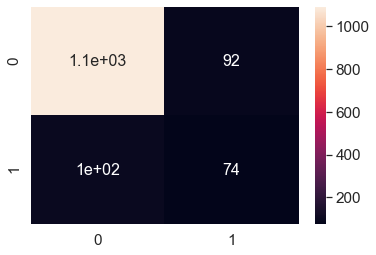

In [76]:
sn.set(font_scale=1.4)#for label size
sn.heatmap(mat_conf, annot=True,annot_kws={"size": 16})

In [78]:
from sklearn import tree


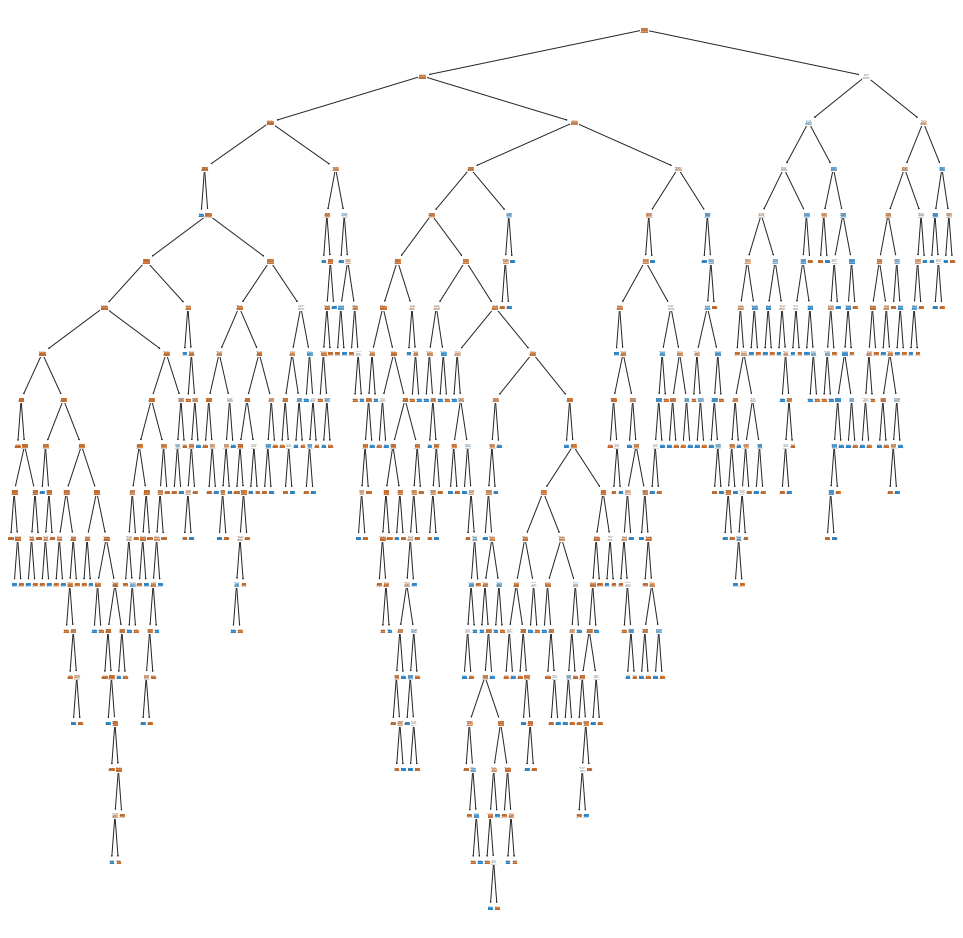

In [79]:
plt.figure(figsize=(17,17))
tree.plot_tree(clf, filled=True)
plt.show()

In [82]:
roc_auc_score(y_test, y_pred, multi_class='ovo', average='weighted')


0.6725114817500604

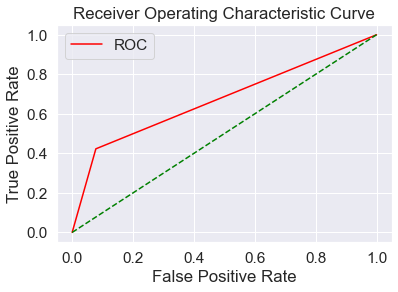

In [83]:
fper, tper, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fper, tper)

# Decision Tree E

In [84]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x_sm,y_sm, test_size=0.3, random_state=1) # 70% training and 30% test

In [85]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [86]:
# Model Accuracy, how often is the classifier correct?
#Indicateurs de performances

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.89375


In [87]:
#rapport de prédiction
print(metrics.classification_report( y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1209
           1       0.88      0.91      0.89      1191

    accuracy                           0.89      2400
   macro avg       0.89      0.89      0.89      2400
weighted avg       0.89      0.89      0.89      2400



In [88]:
print(numpy.unique(y_pred,return_counts=True))


(array([0, 1]), array([1178, 1222], dtype=int64))


In [89]:
mat_conf=metrics.confusion_matrix( y_test,y_pred)
print(metrics.confusion_matrix( y_test,y_pred))

[[1066  143]
 [ 112 1079]]


<AxesSubplot:>

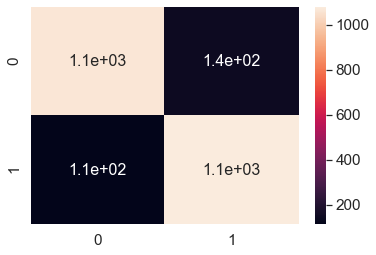

In [91]:
sn.set(font_scale=1.4)#for label size
sn.heatmap(mat_conf, annot=True,annot_kws={"size": 16})

In [92]:
from sklearn.metrics import plot_confusion_matrix


In [94]:
roc_auc_score(y_test, y_pred, multi_class='ovo', average='weighted')


0.8938409035508248

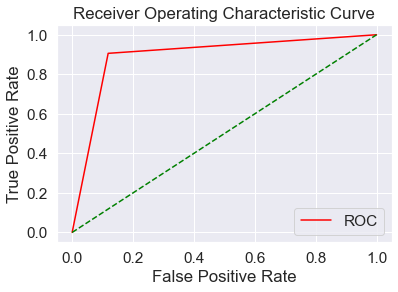

In [95]:
fper, tper, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fper, tper)

# Random Forest NE

In [96]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1) # 70% training and 30% test

In [97]:
clf = RandomForestClassifier( random_state=0)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [98]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8850405305821666


In [99]:
mat_conf=metrics.confusion_matrix( y_test,y_pred)
print(metrics.confusion_matrix( y_test,y_pred))

[[1150   32]
 [ 124   51]]


<AxesSubplot:>

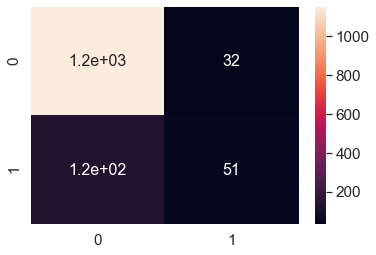

In [100]:
sn.set(font_scale=1.4)#for label size
sn.heatmap(mat_conf, annot=True,annot_kws={"size": 16})

In [101]:
roc_auc_score(y_test, y_pred, multi_class='ovo', average='weighted')


0.6321779066956731

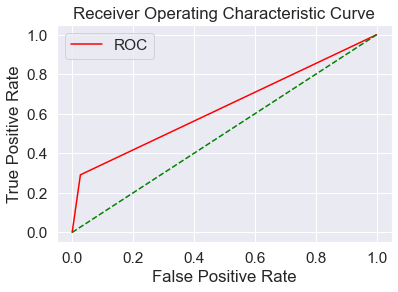

In [102]:
fper, tper, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fper, tper)

# Random Forest E

In [103]:
X_train, X_test, y_train, y_test = train_test_split(x_sm,y_sm, test_size=0.3, random_state=1) # 70% training and 30% test

In [104]:
clf = RandomForestClassifier(random_state=0)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [105]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9370833333333334


In [106]:
print(metrics.classification_report( y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1209
           1       0.92      0.95      0.94      1191

    accuracy                           0.94      2400
   macro avg       0.94      0.94      0.94      2400
weighted avg       0.94      0.94      0.94      2400



In [107]:
mat_conf=metrics.confusion_matrix( y_test,y_pred)
print(metrics.confusion_matrix( y_test,y_pred))

[[1113   96]
 [  55 1136]]


<AxesSubplot:>

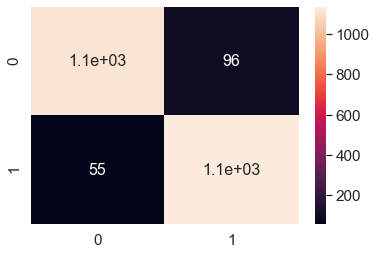

In [108]:
sn.set(font_scale=1.4)#for label size
sn.heatmap(mat_conf, annot=True,annot_kws={"size": 16})

In [109]:
roc_auc_score(y_test, y_pred, multi_class='ovo', average='weighted')


0.9372079262791866

In [110]:
from sklearn.metrics import roc_curve


In [111]:
from sklearn.datasets import make_classification


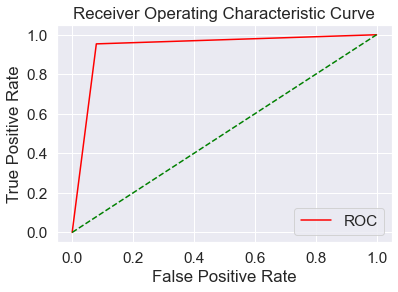

In [112]:
fper, tper, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fper, tper)